Michelson's speed of light measurements earned him a Nobel Prize in Physics. He made them between a source and detector (telescope) that were both on mountains, 35 km apart. A rotating mirror produced a pulse effect, and by tuning the speed on the rotating mirror so that the light beam is coincident with two faces on an octagonal mirror, he could measure the speed of light.

We're going to use his data to illustrate some methods of data analysis.

![Diagram of Michelson's experiment. Taken from sciencetopia.net](Apparatus.jpg)

In [2]:
using CSV, DataFrames, Downloads, Plots

# Download Michelson's speed of light data from a reliable source
url = "https://risk-engineering.org/static/data/michelson-speed-light.csv"
data = Downloads.download(url)
michelson = CSV.read(data, DataFrame)

# The data represents speed of light measurements, showing deviations from 299,000 km/s
# Create histogram of speed values

names(michelson)

speeds = michelson[:, "velocity of light in air (km/s)"]

mean = x->sum(x)/length(x) #λ function to calculate mean

if mean(speeds) ≈ 299852.4
    println("**TEST**: Speeds of light read in successfully.")
end

**TEST**: Speeds of light read in successfully.


Make a histogram of the speed of light data.

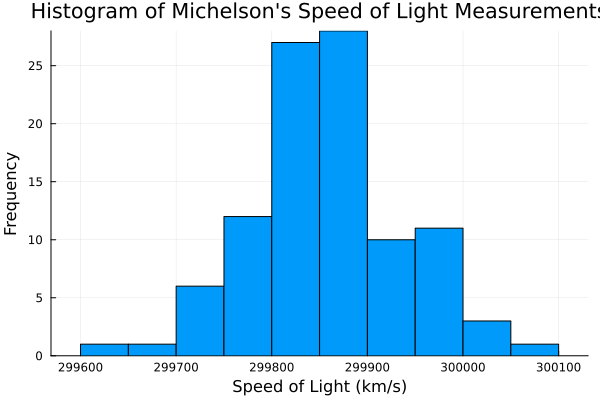

In [3]:
histogram(speeds, 
    xlabel="Speed of Light (km/s)", 
    ylabel="Frequency",
    title="Histogram of Michelson's Speed of Light Measurements",
    bins=20,
    legend=false)

The histogram looks asymmetric, so it's not clear that the standard formulae for finding the most probable value of c and assigning uncertainty work here. What we will do instead is construct synthetic data sets using the **bootstrap Monte Carlo method**. 

The bootstrap consists of the following steps:

* 1. Construct $N$ synthetic data sets by *resampling* the original data *with replacement*.
* 2. Compute the mean of each synthetic data set.
* 3. Analyze the distribution of the means computed from the synthetic data.

Let's code it up.